In [19]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

df = pd.read_csv('Mall_Customers.csv')
df.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [20]:
df.rename(index=str, columns={'Annual Income (k$)': 'Income',
                              'Spending Score (1-100)': 'Score'}, inplace=True)
df.head()

,CustomerID,Gender,Age,Income,Score
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [21]:
df.corr()

,CustomerID,Age,Income,Score
CustomerID,1.000000,-0.026763,0.977548,0.013835
Age,-0.026763,1.000000,-0.012398,-0.327227
Income,0.977548,-0.012398,1.000000,0.009903
Score,0.013835,-0.327227,0.009903,1.000000


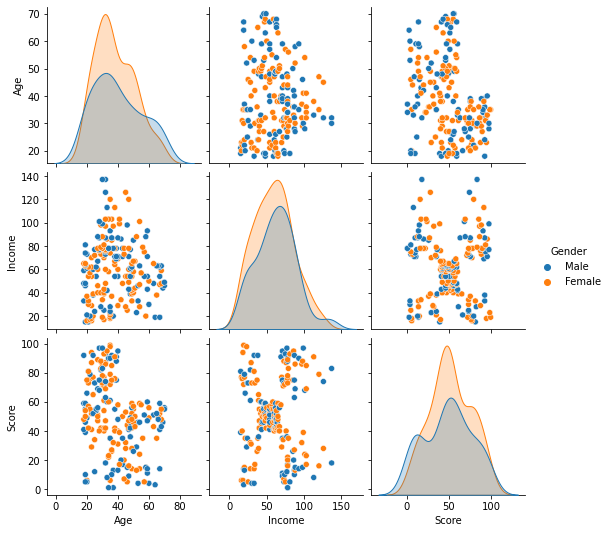

In [22]:
sns.pairplot(df.drop('CustomerID', axis=1), hue='Gender')
plt.show()

C:\Users\mater_m1\Anaconda3\envs\statistica\lib\site-packages\sklearn\cluster\_kmeans.py:882: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  f"KMeans is known to have a memory leak on Windows "


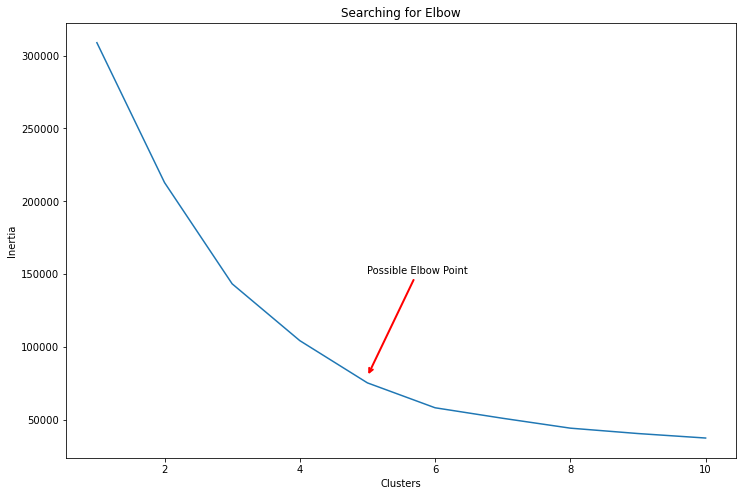

In [23]:
from sklearn.cluster import KMeans

X = df.drop(['CustomerID', 'Gender'], axis=1)

clusters = []

for i in range(1, 11):
    km = KMeans(n_clusters=i).fit(X)
    clusters.append(km.inertia_)
    
fig, ax = plt.subplots(figsize=(12, 8))
sns.lineplot(x=list(range(1, 11)), y=clusters, ax=ax)
ax.set_title('Searching for Elbow')
ax.set_xlabel('Clusters')
ax.set_ylabel('Inertia')

# Annotate arrow
ax.annotate('Possible Elbow Point', xy=(5, 80000), xytext=(5, 150000), xycoords='data',          
             arrowprops=dict(arrowstyle='->', connectionstyle='arc3', color='red', lw=2))

plt.show()

C:\Users\mater_m1\Anaconda3\envs\statistica\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


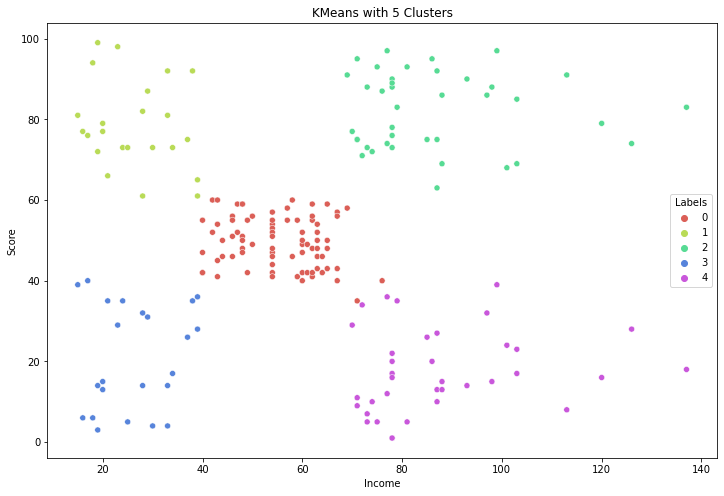

In [24]:
# 5 clusters
km5 = KMeans(n_clusters=5).fit(X)

X['Labels'] = km5.labels_
plt.figure(figsize=(12, 8))
sns.scatterplot(X['Income'], X['Score'], hue=X['Labels'], 
                palette=sns.color_palette('hls', 5))
plt.title('KMeans with 5 Clusters')
plt.show()

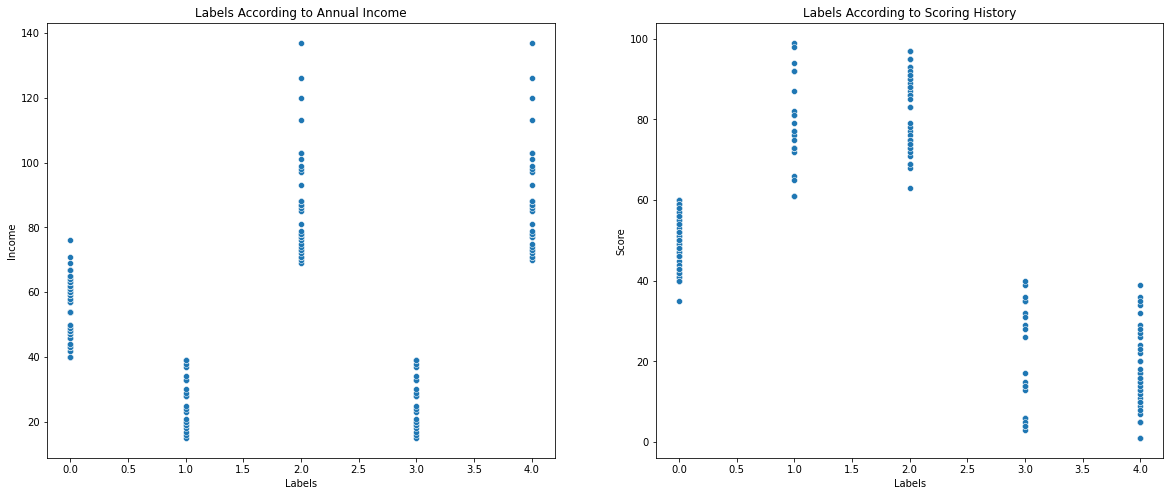

In [26]:
fig = plt.figure(figsize=(20,8))
ax = fig.add_subplot(121)
sns.scatterplot(x='Labels', y='Income', data=X, ax=ax)
ax.set_title('Labels According to Annual Income')

ax = fig.add_subplot(122)
sns.scatterplot(x='Labels', y='Score', data=X, ax=ax)
ax.set_title('Labels According to Scoring History')

plt.show()

C:\Users\mater_m1\Anaconda3\envs\statistica\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


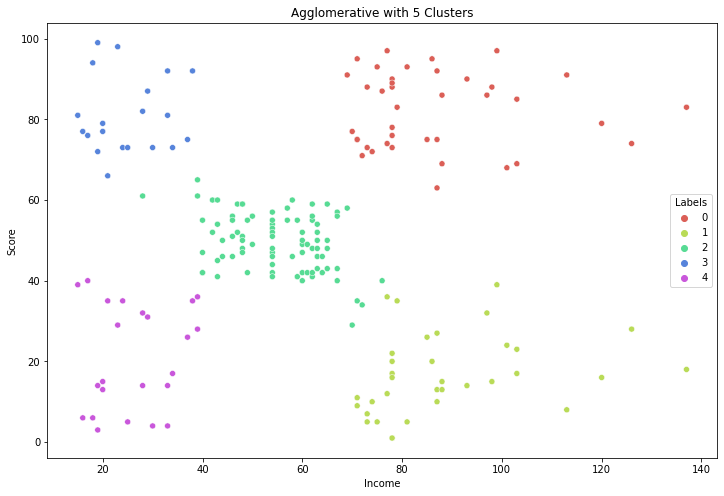

In [27]:
from sklearn.cluster import AgglomerativeClustering 

agglom = AgglomerativeClustering(n_clusters=5, linkage='average').fit(X)

X['Labels'] = agglom.labels_
plt.figure(figsize=(12, 8))
sns.scatterplot(X['Income'], X['Score'], hue=X['Labels'], 
                palette=sns.color_palette('hls', 5))
plt.title('Agglomerative with 5 Clusters')
plt.show()

C:\Users\mater_m1\Anaconda3\envs\statistica\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


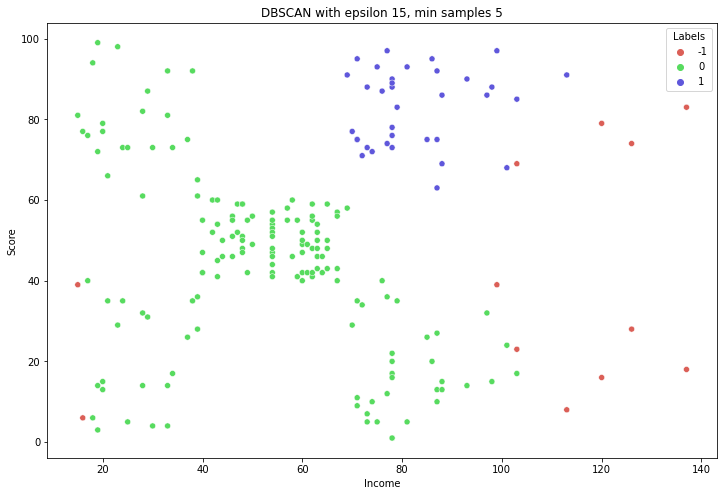

In [28]:
from sklearn.cluster import DBSCAN 


db = DBSCAN(eps=15, min_samples=5).fit(X)

X['Labels'] = db.labels_
plt.figure(figsize=(12, 8))
sns.scatterplot(X['Income'], X['Score'], hue=X['Labels'], 
                palette=sns.color_palette('hls', np.unique(db.labels_).shape[0]))
plt.title('DBSCAN with epsilon 15, min samples 5')
plt.show()